## Guide - pyLEnM package 
# Case 1 - Basics
Welcome to the demonstration notebook where we'll go over all of the Basic functions in the **pyLEnM** package!<br>
Let’s get started!


## Installing, Importing, and Understanding the package

Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [ ]:
# pip install pylenm

In [1]:
# Import our packages
import pylenm
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.13.7'

The pyLEnM package has two modules as follows: 
   <br>1. **functions:** where all of the package functionality is imported.
   <br>2. **usage:** where all of the fucntion descriptions are imported.

Let's import each of these individually from the package:

In [3]:
from pylenm import functions, usage

Let's start with the **usage** module.
The module has 2 useful functions to help you understand how to use the pyLEnM functions:<br>
   1. **get_FunctionList():** lists the functions available in the package.<br>
   2. **get_FunctionDescription():** provides a detailed description of a function(s) including the parameters.

Let's see what pyLEnM has to offer:

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date_range
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map
    24) getCommonDates
    25) getCleanData
    26) getJointData
    27) get_Best_GP
    28) fit_gp
    29) interpolate_topo
    30) get_Best_Wells




You can run **get_FunctionDescription()** on its own to get ALL function descriptions: ...

In [5]:
usage.get_FunctionDescription()

--------------------------------------------------------------------------------------
1) simplify_data
------------------------------------------

simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the d

... or simply specify the name (as a string) of the function you would like a description for:

In [6]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

If at any point you forget what or how to use any of the pyLEnM fucntions, refer back to the usage module! 

## Using pyLEnM

Now let's get our hands dirty and start exploring the **functions** module.

First, import our two datasets here. It's located in the same directory in a folder called `data`.<br><br>
PyLEnM takes in two datasets: <br>
1. **Concentration Data:** Dataset containing the concetration values<br>
2. **Construction Data:** Dataset containing the construction information of locations such as the Longitude and Latitude values.

In [7]:
url_1 = 'https://raw.githubusercontent.com/AurelienMeray/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015_Reduced_Demo.csv'
url_2 = 'https://github.com/AurelienMeray/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

Now that we have our data imported let's save the data into our functions class.

We do this by initializing **functions** with our data. We'll call the instance pylenm

In [8]:
# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



If the data passed doesn't meet the package requiremnts, you'll be presented with the following message.

To demonstrate the requirments we'll pass an arbitrary list instead of a dataframe.

In [9]:
functions([1,2,3,4,5])

ERROR: Make sure the data is a pandas DataFrame.

PYLENM DATA REQUIREMENTS:
The imported data needs to meet ALL of the following conditions to have a successful import:
   1) Data should be a pandas dataframe.
   2) Data must have these column names: 
      ['COLLECTION_DATE','STATION_ID','ANALYTE_NAME','RESULT','RESULT_UNITS']


We can view the concentration data we imported by running the `getData()` function.

In [10]:
pylenm.getData()

ID FACILITY  FFA_INDEX_NO SRS_AREA  \
0      767202      SRS            19      GSA   
1      767203      SRS            19      GSA   
2      767204      SRS            19      GSA   
3      767205      SRS            19      GSA   
4      767206      SRS            19      GSA   
...       ...      ...           ...      ...   
88219  785623      SRS            19      GSA   
88220  785624      SRS            19      GSA   
88221  785625      SRS            19      GSA   
88222  785626      SRS            19      GSA   
88223  785627      SRS            19      GSA   

                                           OPERABLE_UNIT STATION_ID  \
0      F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FOB 15D   
1      F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB133D   
2      F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB134D   
3      F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB136D   
4      F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB122D   
...                                                  ...        ...   
88219  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FBI 14D   
88220  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FBI 17D   
88221  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FSB117D   
88222  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...    FBI 15D   
88223  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...     FSB 79   

          STATION_TYPE  SEIR_ID                      WELL_USE  REVISION_ID  \
0      MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
1      MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
2      MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
3      MONITORING WELL      NaN  F_PLUME_ASSESS; H_AUX;MW_AUX          NaN   
4      MONITORING WELL      NaN          F_PLUME;H_AUX;MW_AUX          NaN   
...                ...      ...                           ...          ...   
88219  MONITORING WELL      NaN                           NaN          NaN   
88220  MONITORING WELL      NaN                           NaN          NaN   
88221  MONITORING WELL      NaN          F_PLUME;H_AUX;MW_AUX          NaN   
88222  MONITORING WELL      NaN                           NaN          NaN   
88223  MONITORING WELL      NaN          F_PLUME;H_AUX;MW_AUX          NaN   

        SAMPLE_EVENT  LOG_BOOK_NO SAMPLE_NAME COLLECTION_DATE  QUARTER  \
0         1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q   
1         1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q   
2         1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q   
3         1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q   
4         1Q15FBWSWL          NaN         NaN          1/8/15  2015-1Q   
...              ...          ...         ...             ...      ...   
88219  3Q15FSIFIELD4          NaN         NaN         9/24/15  2015-3Q   
88220  3Q15FSIFIELD4          NaN         NaN         9/24/15  2015-3Q   
88221  3Q15FSIFIELD4          NaN         NaN         9/24/15  2015-3Q   
88222  3Q15FSIFIELD4          NaN         NaN         9/24/15  2015-3Q   
88223  3Q15FSIFIELD4          NaN         NaN         9/24/15  2015-3Q   

      SAMPLE_USE    ANALYTE_NAME ANALYTICAL_METHOD    CAS_NO  \
0            NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
1            NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
2            NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
3            NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
4            NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
...          ...             ...               ...       ...   
88219        NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
88220        NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
88221        NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
88222        NaN  DEPTH_TO_WATER               NaN  H20DEPTH   
88223        NaN  DEPTH_TO_WATER       

The same can be done for the construction data by running the `get_Construction_Data()` function.

In [11]:
pylenm.get_Construction_Data()

FACILITY_ID SITE_GROUP  \
STATION_ID                          
FAI001A            SRS        GSA   
FAI001B            SRS        GSA   
FAI001C            SRS        GSA   
FAI001D            SRS        GSA   
FAI002A            SRS        GSA   
...                ...        ...   
FSP-12A            SRS        GSA   
FSP204A            SRS        GSA   
FSP226A            SRS        GSA   
FSP249A            SRS        GSA   
FSP249B            SRS        GSA   

                                                    SITE_NAME  \
STATION_ID                                                      
FAI001A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001B     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001C     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI001D     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FAI002A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
...                                                       ...   
FSP-12A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP204A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP226A     F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
FSP249A     F-AREA WETLANDS PIEZOMETERS FOR WATER TABLE MO...   
FSP249B     F-AREA WETLANDS PIEZOMETERS FOR WATER TABLE MO...   

               STATION_TYPE               WELL USE    AQUIFER  \
STATION_ID                                                      
FAI001A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001B     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001C     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI001D     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
FAI002A     MONITORING WELL  Auxiliary Observation  UAZ_UTRAU   
...                     ...                    ...        ...   
FSP-12A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP204A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP226A            SEEPLINE     Wetland Piezometer  UAZ_UTRAU   
FSP249A     PIEZOMETER WELL     Wetland Piezometer  UAZ_UTRAU   
FSP249B     PIEZOMETER WELL     Wetland Piezometer  UAZ_UTRAU   

                        WELL_USE   LATITUDE  LONGITUDE     EASTING  \
STATION_ID                                                           
FAI001A     ACTIVE ECO-SENSITIVE  33.273872 -81.622904  441989.564   
FAI001B     ACTIVE ECO-SENSITIVE  33.273873 -81.622891  441990.781   
FAI001C     ACTIVE ECO-SENSITIVE  33.273874 -81.622895  441990.432   
FAI001D     ACTIVE ECO-SENSITIVE  33.273874 -81.622901  441989.928   
FAI002A     ACTIVE ECO-SENSITIVE  33.263961 -81.685462  436156.287   
...                          ...        ...        ...         ...   
FSP-12A     ACTIVE ECO-SENSITIVE  33.269561 -81.679075  436755.266   
FSP204A     ACTIVE ECO-SENSITIVE  33.267533 -81.680587  436612.996   
FSP226A     ACTIVE ECO-SENSITIVE  33.267186 -81.681189  436556.675   
FSP249A     ACTIVE ECO-SENSITIVE  33.265634 -81.682655  436418.964   
FSP249B     ACTIVE ECO-SENSITIVE  33.265644 -81.682660  436418.523   

               NORTHING  SZ_TOP(FT MSL)  SZ_BOT(FT MSL)  GROUND_ELEVATION  \
STATION_ID                                                                  
FAI001A     3681629.999          232.30          231.30             250.1   
FAI001B     3681630.192          241.60          240.60             250.2   
FAI001C     3681630.247          243.68          242.68             250.2   
FAI001D     3681630.223          247.75          246.75             250.1   
FAI002A     3680567.719          166.88          165.88             185.1   
...                 ...             ...             ...               ...   
FSP-12A     3681184.762          188.78          186.27             200.7   
FSP204A     3680960.787          178.27          175.78             190.5   
FSP226A     3680922.679          177.41          174.90             189.5   
FSP249A     3680751.569          173.00          170.50             185.5   
FS

At any point we can also reset the current working dataset by running `setData()` for the concentration data and `setConstructionData()` for the construction data.

In [12]:
pylenm.setData(concentration_data)
pylenm.setConstructionData(construction_data)

Successfully imported the data!

Successfully imported the construction data!



Let's make use of the **simplify_data** function to get rid of columns we don't need for analysis.

Just as a reminder, we'll call `usage.get_FunctionDescription('simplify_data')` to get details on how to use it.

In [13]:
usage.get_FunctionDescription('simplify_data')


simplify_data (data=None, inplace=False, columns=None, save_csv=False,
                   file_name='data_simplified', save_dir='data/')
Description:
    Removes all columns except 'COLLECTION_DATE', 'STATION_ID', 'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'.
    If the user specifies additional columns in addition to the ones listed above, those columns will be kept.
    The function returns a dataframe and has an optional parameter to be able to save the dataframe to a csv file.
Parameters:
    data (dataframe): data to simplify
    inplace (bool): save data to current working dataset
    columns (list of strings): list of any additional columns on top of  ['COLLECTION_DATE', 'STATION_ID', 
        'ANALYTE_NAME', 'RESULT', and 'RESULT_UNITS'] to be kept in the dataframe.
    save_csv (bool): flag to determine whether or not to save the dataframe to a csv file.
    file_name (string): name of the csv file you want to save
    save_dir (string): name of the directory you want to save

We'll set the `inplace` parameter to `True` to make it the default working dataset. 

In [14]:
pylenm.simplify_data(inplace=True)

COLLECTION_DATE STATION_ID          ANALYTE_NAME  RESULT RESULT_UNITS
0          1990-01-01     FSB 77                    PH    3.30           pH
1          1990-01-01    FSB105C        DEPTH_TO_WATER   80.49           ft
2          1990-01-01    FSB107D  SPECIFIC CONDUCTANCE  289.00        uS/cm
3          1990-01-01    FSB101A        DEPTH_TO_WATER  134.49           ft
4          1990-01-01    FSB101A  SPECIFIC CONDUCTANCE  161.00        uS/cm
...               ...        ...                   ...     ...          ...
86206      2015-09-24    FBI 15D        DEPTH_TO_WATER   15.40           ft
86207      2015-09-24    FSB127D        DEPTH_TO_WATER   18.20           ft
86208      2015-09-24    FSB113C        DEPTH_TO_WATER   23.20           ft
86209      2015-09-24    FOB 13D        DEPTH_TO_WATER   21.50           ft
86210      2015-09-24     FSB 79        DEPTH_TO_WATER   19.76           ft

[86211 rows x 5 columns]

## Basic Functions

Let's generate some useful reports about the data by calling `get_analyte_details` and `get_data_summary`

In [15]:
pylenm.get_analyte_details(analyte_name='DEPTH_TO_WATER')

Start Date    End Date  Date Range (days)  Unique samples
Well Name                                                           
FSB 94D    1990-01-01  1990-10-08                280               4
FSB 95D    1990-01-01  1990-10-08                280               4
FSB 77     1990-01-01  2006-10-16               6132             122
FSB111C    1990-01-01  2006-10-17               6133             115
FSB105C    1990-01-01  2006-10-19               6135             127
...               ...         ...                ...             ...
FSB146D    2015-04-29  2015-09-09                133               9
FSB145D    2015-04-30  2015-09-09                132               9
FSB143D    2015-05-04  2015-09-09                128               9
FSB144D    2015-05-04  2015-09-09                128               9
FSB142D    2015-05-05  2015-09-09                127               9

[155 rows x 4 columns]

Most functions have a filtering feature which uses the `filter_by_column` fucntion to reduced the search space.<br>
We'll run `get_analyte_details` again but this time we'll view the results for the 'Lower Aquifer' wells only.

In [16]:
pylenm.get_analyte_details('TRITIUM', filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

Start Date    End Date  Date Range (days)  Unique samples
Well Name                                                           
FSB 93C    1990-01-01  2015-07-28               9339             103
FSB107C    1990-01-01  2015-08-04               9346             103
FSB 94C    1990-01-02  2015-07-28               9338             109
FSB 97C    1990-01-03  2015-07-29               9338             103
FSB 98C    1990-01-03  2015-07-29               9338             102
FSB 87C    1990-01-06  2015-07-27               9333             103
FSB102C    1990-01-06  2015-07-28               9334             102
FSB 90C    1990-01-07  2015-07-28               9333             103
FSB 78C    1990-01-07  2015-08-03               9339             109
FSB 91C    1990-01-07  2015-08-03               9339              98
FSB 76C    1990-01-09  2015-07-27               9330             114
FSB 99C    1990-01-09  2015-07-29               9332             103
FSB104C    1990-01-09  2015-07-30               9333             103
FSB 79C    1990-01-09  2015-08-03               9337             102
FSB 88C    1990-01-16  2015-07-28               9324             103
FSB 89C    1990-01-16  2015-07-28               9324             103
FSB114C    1991-02-05  2015-07-27               8938              99
FSB122C    1991-02-06  2015-07-30               8940              97
FSB120C    1991-02-06  2015-08-04               8945              99
FSB112C    1991-02-06  2015-08-10               8951              97
FSB121C    1991-02-07  2015-02-04               8763              73
FSB123C    1991-02-10  2015-01-21               8746              73
FSB116C    1991-02-10  2015-01-22               8747              60
FSB115C    1991-02-11  2015-01-21               8745              60
FSB113C    1991-02-11  2015-07-27               8932              78
FSB 95CR   1991-02-24  2015-07-29               8921             105
FSB 92C    1993-11-07  2015-08-10               7946              87
FOB  2C    2004-05-05  2004-05-05                  0               1
FOB 14C    2004-05-05  2004-05-05                  0               1

`get_data_summary` is another useful summarization function.

In [17]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'], sort_by='wells')

Start Date   End Date Date Range (days)  # unique wells  \
Analyte Name                                                                   
TRITIUM              1990-01-01 2015-09-23         9396 days             160   
PH                   1990-01-01 2015-09-23         9396 days             158   
SPECIFIC CONDUCTANCE 1990-01-01 2015-09-23         9396 days             156   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days             155   
IODINE-129           1990-01-06 2015-09-23         9391 days             150   
URANIUM-238          1990-01-06 2015-09-23         9391 days             144   

                      # samples    Unit         mean          std      min  \
Analyte Name                                                                 
TRITIUM                   13476  pCi/mL  1248.316406  3261.565925   -0.628   
PH                        18517      pH     5.354886     1.529332    0.000   
SPECIFIC CONDUCTANCE      18276   uS/cm   425.754861   555.068915    0.000   
DEPTH_TO_WATER            20091      ft    46.814224    38.137888    0.500   
IODINE-129                 5405   pCi/L    41.624339    92.511351 -356.900   
URANIUM-238                5319   pCi/L    66.398114   169.240747   -2.650   

                         25%     50%     75%      max  
Analyte Name                                           
TRITIUM               25.300  193.00  934.00  44800.0  
PH                     4.100    5.20    6.40     12.7  
SPECIFIC CONDUCTANCE  87.000  213.00  544.00  10700.0  
DEPTH_TO_WATER        16.450   32.17   72.90    177.2  
IODINE-129             0.996    9.37   45.10   1620.0  
URANIUM-238            0.062    0.64   43.75   1810.0

Here is the same function but with the same filtering we applied above ('Lower Aquifer' wells).

In [18]:
pylenm.get_data_summary(analytes=['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE',
                                  'PH','URANIUM-238', 'DEPTH_TO_WATER'],
                                  filter=True, col='AQUIFER', equals=['LAZ_UTRAU'], sort_by='wells')

Start Date   End Date Date Range (days)  # unique wells  \
Analyte Name                                                                   
TRITIUM              1990-01-01 2015-08-10         9352 days              29   
SPECIFIC CONDUCTANCE 1990-01-01 2015-08-10         9352 days              29   
PH                   1990-01-01 2015-08-10         9352 days              29   
DEPTH_TO_WATER       1990-01-01 2015-09-24         9397 days              29   
IODINE-129           1990-01-06 2015-08-10         9347 days              27   
URANIUM-238          1990-01-06 2015-08-10         9347 days              27   

                      # samples    Unit         mean          std     min  \
Analyte Name                                                                
TRITIUM                    2961  pCi/mL  1904.185517  3350.574654  -0.387   
SPECIFIC CONDUCTANCE       4350   uS/cm   547.272770   668.286641   0.000   
PH                         4402      pH     5.208301     1.135237   0.000   
DEPTH_TO_WATER             4138      ft    54.328794    25.240702   4.750   
IODINE-129                 1246   pCi/L    29.382026    40.177638 -16.150   
URANIUM-238                1277   pCi/L    60.123929   130.590327  -0.408   

                          25%     50%       75%       max  
Analyte Name                                               
TRITIUM               69.7000  638.00  1630.000  40000.00  
SPECIFIC CONDUCTANCE  72.0000  300.00   660.000  10600.00  
PH                     4.4000    5.30     5.830     12.60  
DEPTH_TO_WATER        25.5150   67.45    75.680    120.13  
IODINE-129             2.0000   11.00    36.075    233.00  
URANIUM-238            0.0527    0.48    46.000   1030.00

In [19]:
pylenm.filter_by_column(construction_data, col='AQUIFER', equals=['LAZ_UTRAU'])

FACILITY_ID SITE_GROUP                                          SITE_NAME  \
44          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
47          SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
144         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
148         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
150         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
153         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
156         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
160         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
164         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
165         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
169         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
170         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
174         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
178         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
182         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
183         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
210         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
215         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
219         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
223         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
225         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
227         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
229         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
231         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
233         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
235         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
237         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
241         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
247         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
251         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
254         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
260         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
262         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
269         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
278         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
282         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
285         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
287         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
289         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
296         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
298         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
301         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   
303         SRS        GSA  F & H-AREA HAZARDOUS WASTE MANAGEMENT FACILITI...   

    STATION_ID     STATION_TYPE                  WELL USE    AQUIFER WELL_USE  \
44     FBI 14C  MONITORING WELL     Auxiliary Observation  LAZ_UTRAU   ACTIVE   
47     FBI 16C  MONITORING WELL     Auxiliary Observation  LAZ_UTRAU   ACTIVE   
144    FOB  2C  MONITORING WELL     Auxiliary Observation  LAZ_UTRAU   ACTIVE   
148    FOB  5C  MONITORING WELL     Auxiliary Observation  LAZ_UTRAU   ACTIVE   
150    FOB  7C  MONITORING WELL   

In [20]:
pylenm.get_well_analytes(well_name='FSB102C')

FSB102C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']



In [21]:
pylenm.get_well_analytes(filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

FSB107C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 93C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 94C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 97C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 98C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB102C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 87C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 90C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', 'TRITIUM', 'URANIUM-238']

FSB 78C
['DEPTH_TO_WATER', 'IODINE-129', 'PH', 'SPECIFIC CONDUCTANCE', 'STRONTIUM-90', '

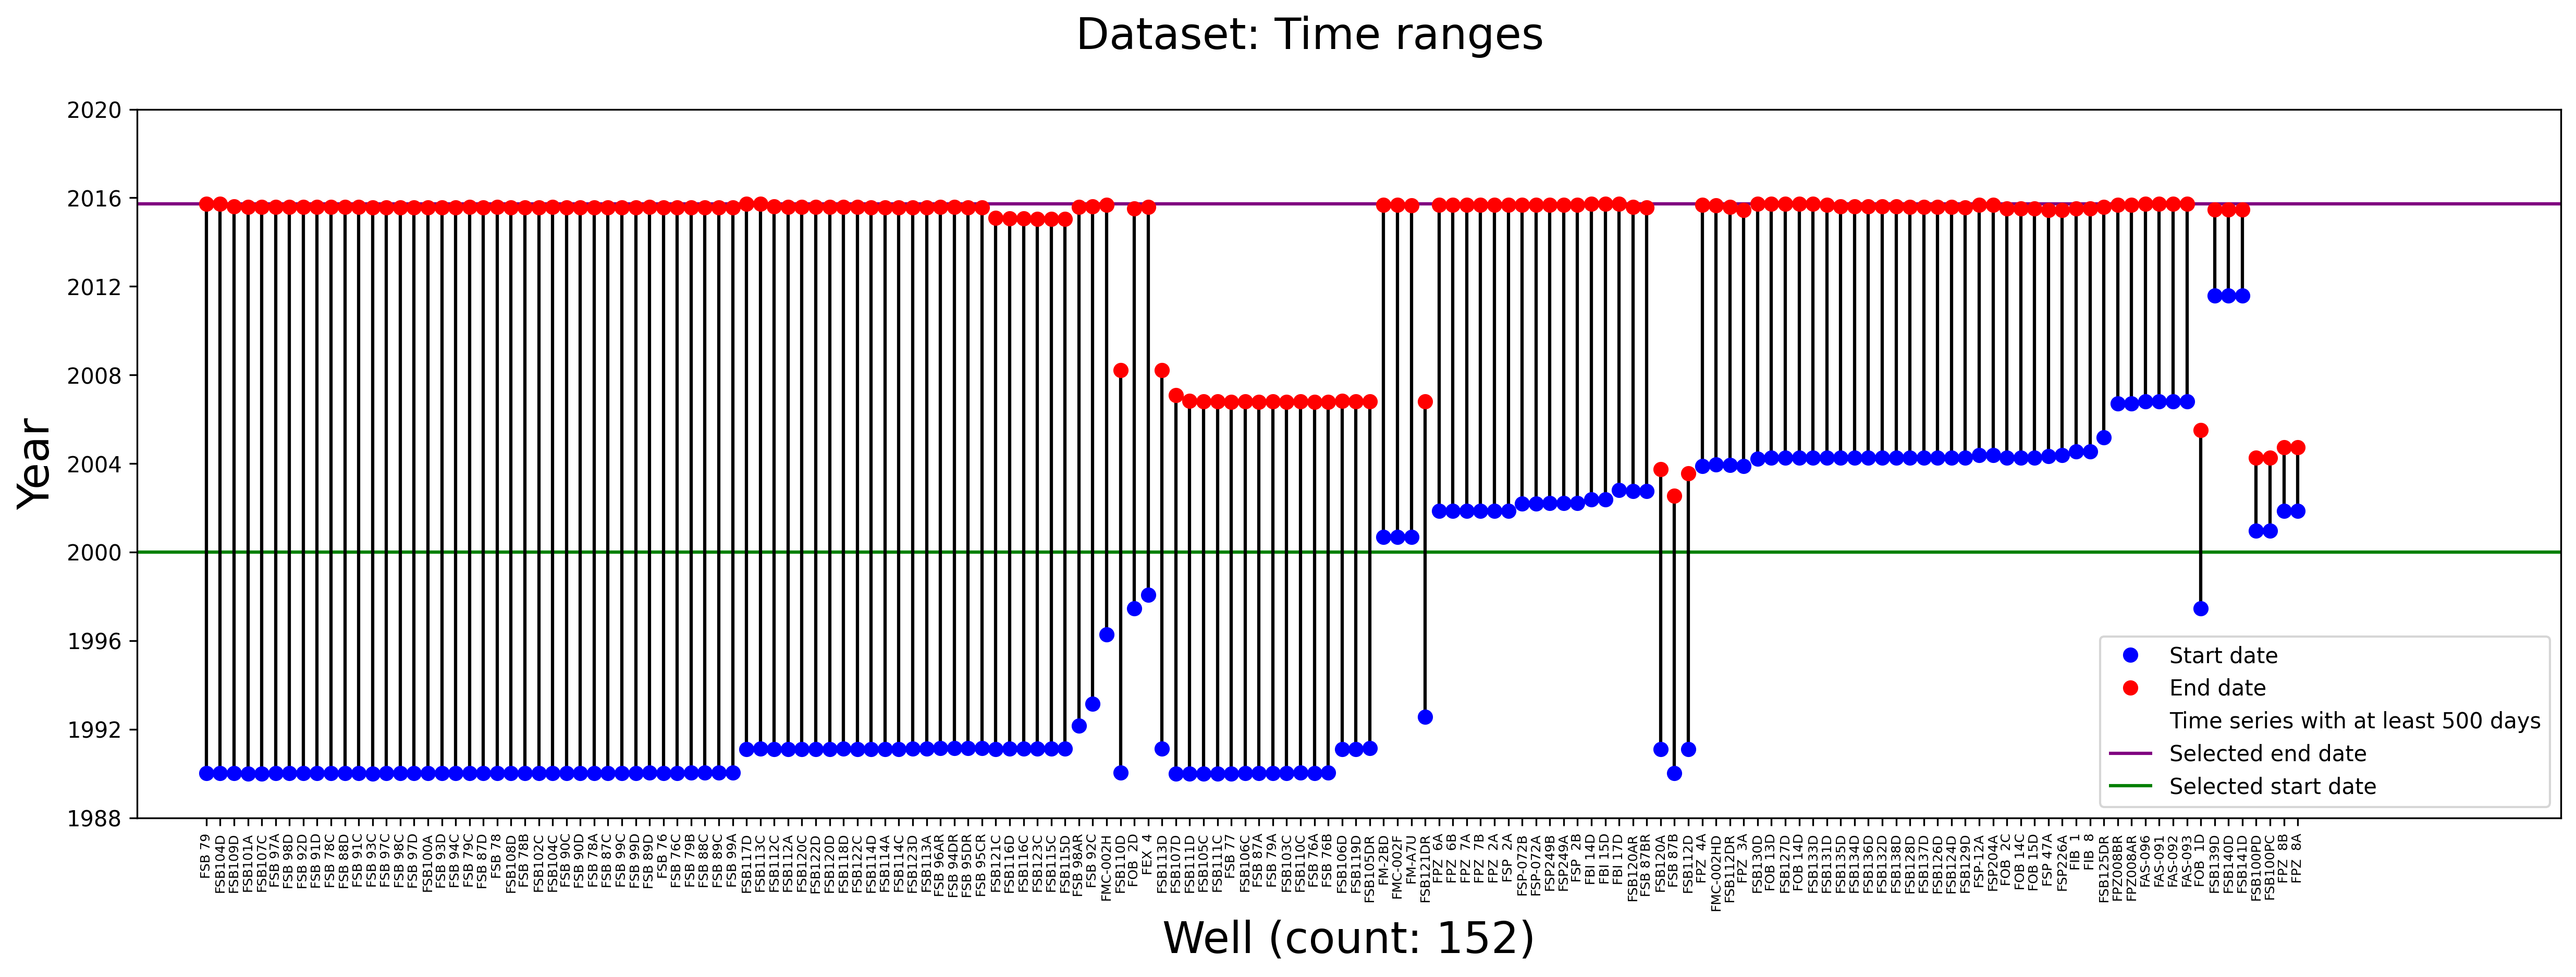

In [22]:
pylenm.plot_all_time_series_simple(start_date='2000-1-1', min_days=500)

STATION_ID START_DATE   END_DATE  RANGE
0      FSB 92D 1990-01-06 2015-08-03   9340
1      FSB 91D 1990-01-06 2015-08-03   9340
2      FSB 78C 1990-01-07 2015-08-03   9339
3      FSB 79C 1990-01-09 2015-08-03   9337
4       FSB 79 1990-01-09 2015-08-03   9337
..         ...        ...        ...    ...
139    FSB139D 2012-06-05 2013-06-18    378
140    FSB140D 2012-06-05 2013-06-18    378
141    FSP  2C 2002-06-25 2002-09-17     84
142    FOB  1D 2004-04-23 2004-06-22     60
143    FOB 14D 2004-06-23 2004-08-19     57

[144 rows x 4 columns]

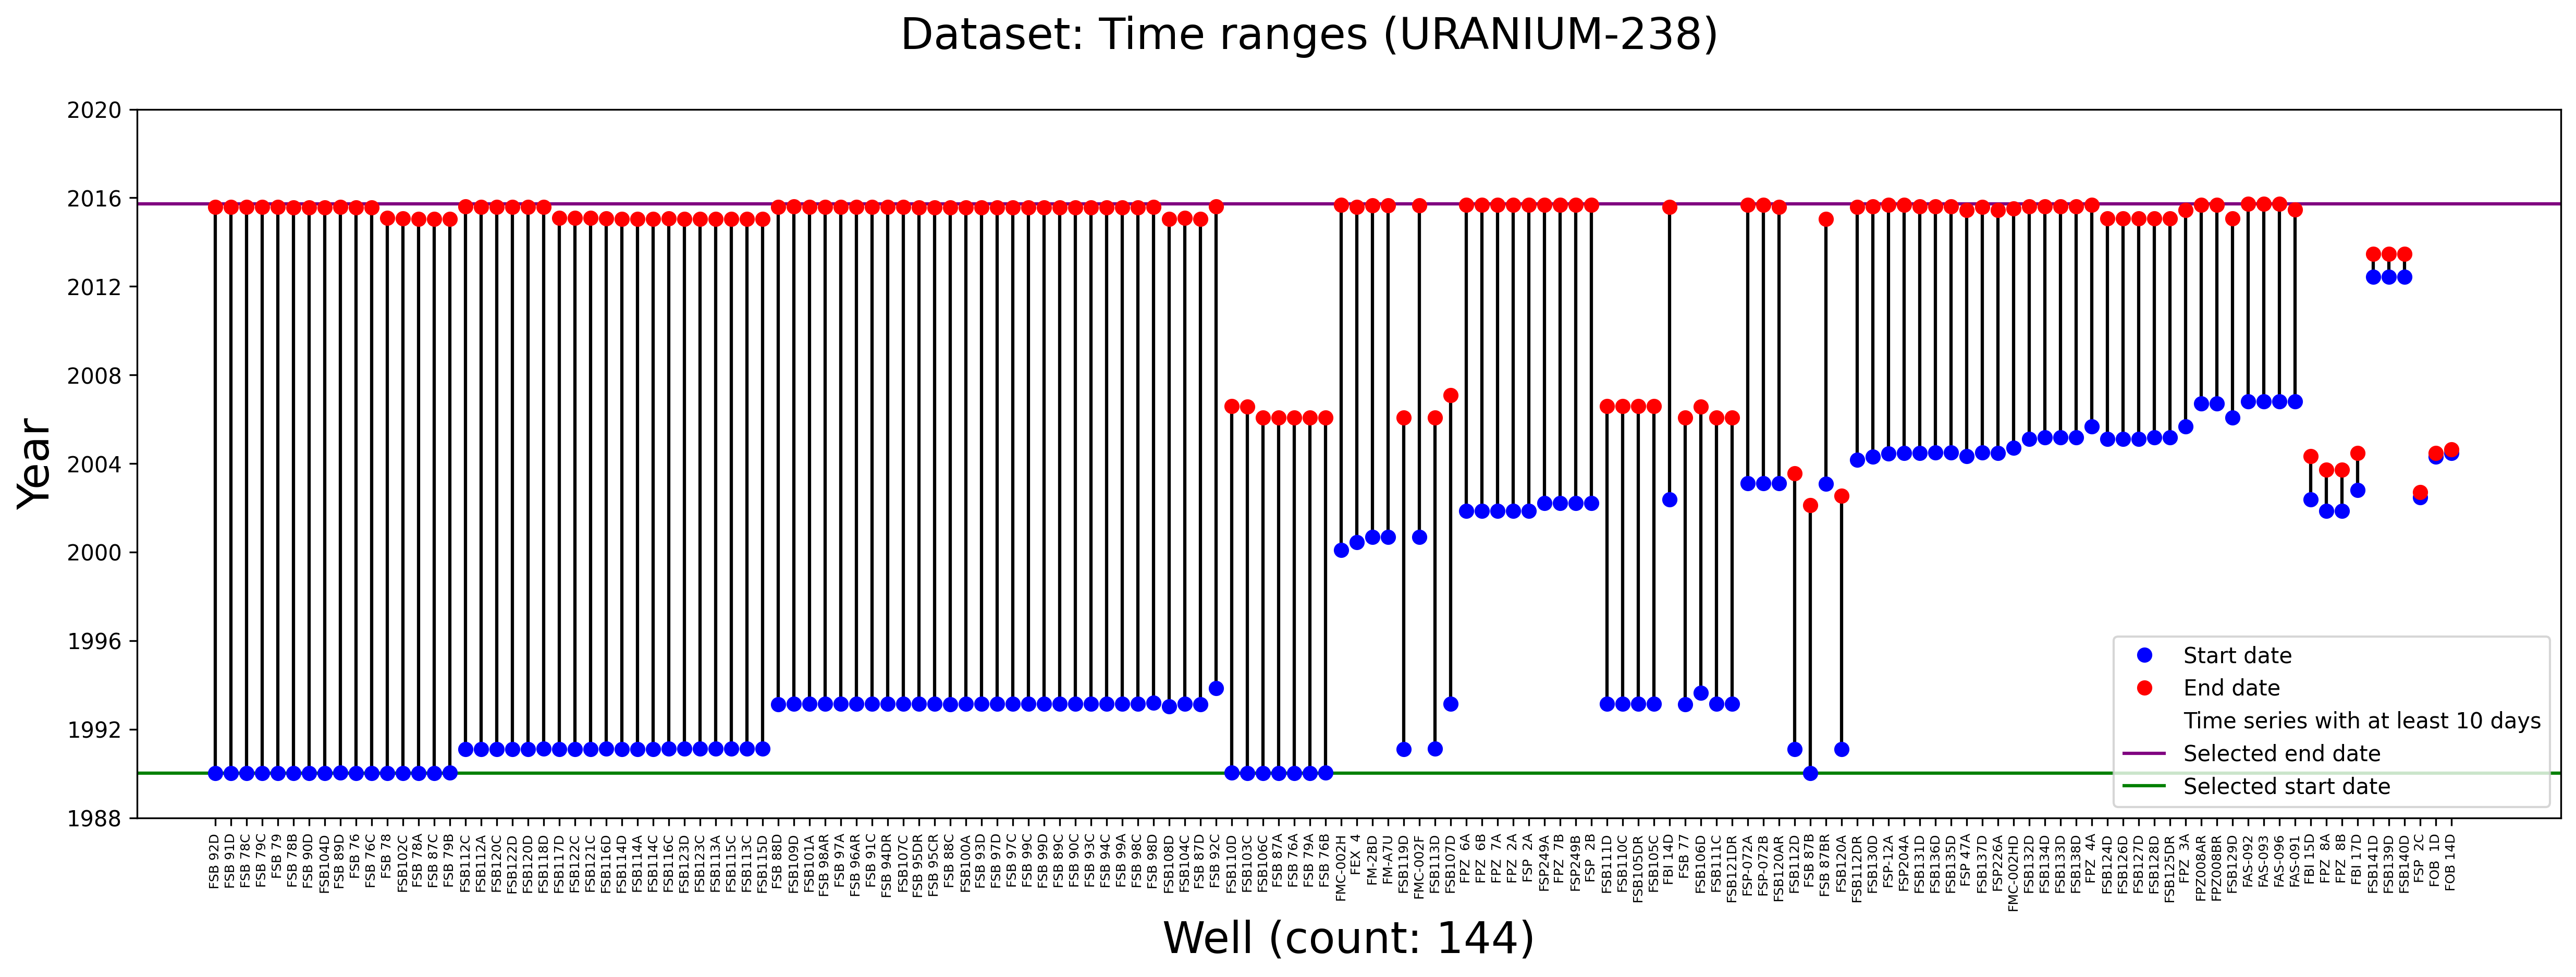

In [23]:
ur = pylenm.plot_all_time_series_simple(analyte_name='URANIUM-238', x_max_lim=150, return_data=True)
ur

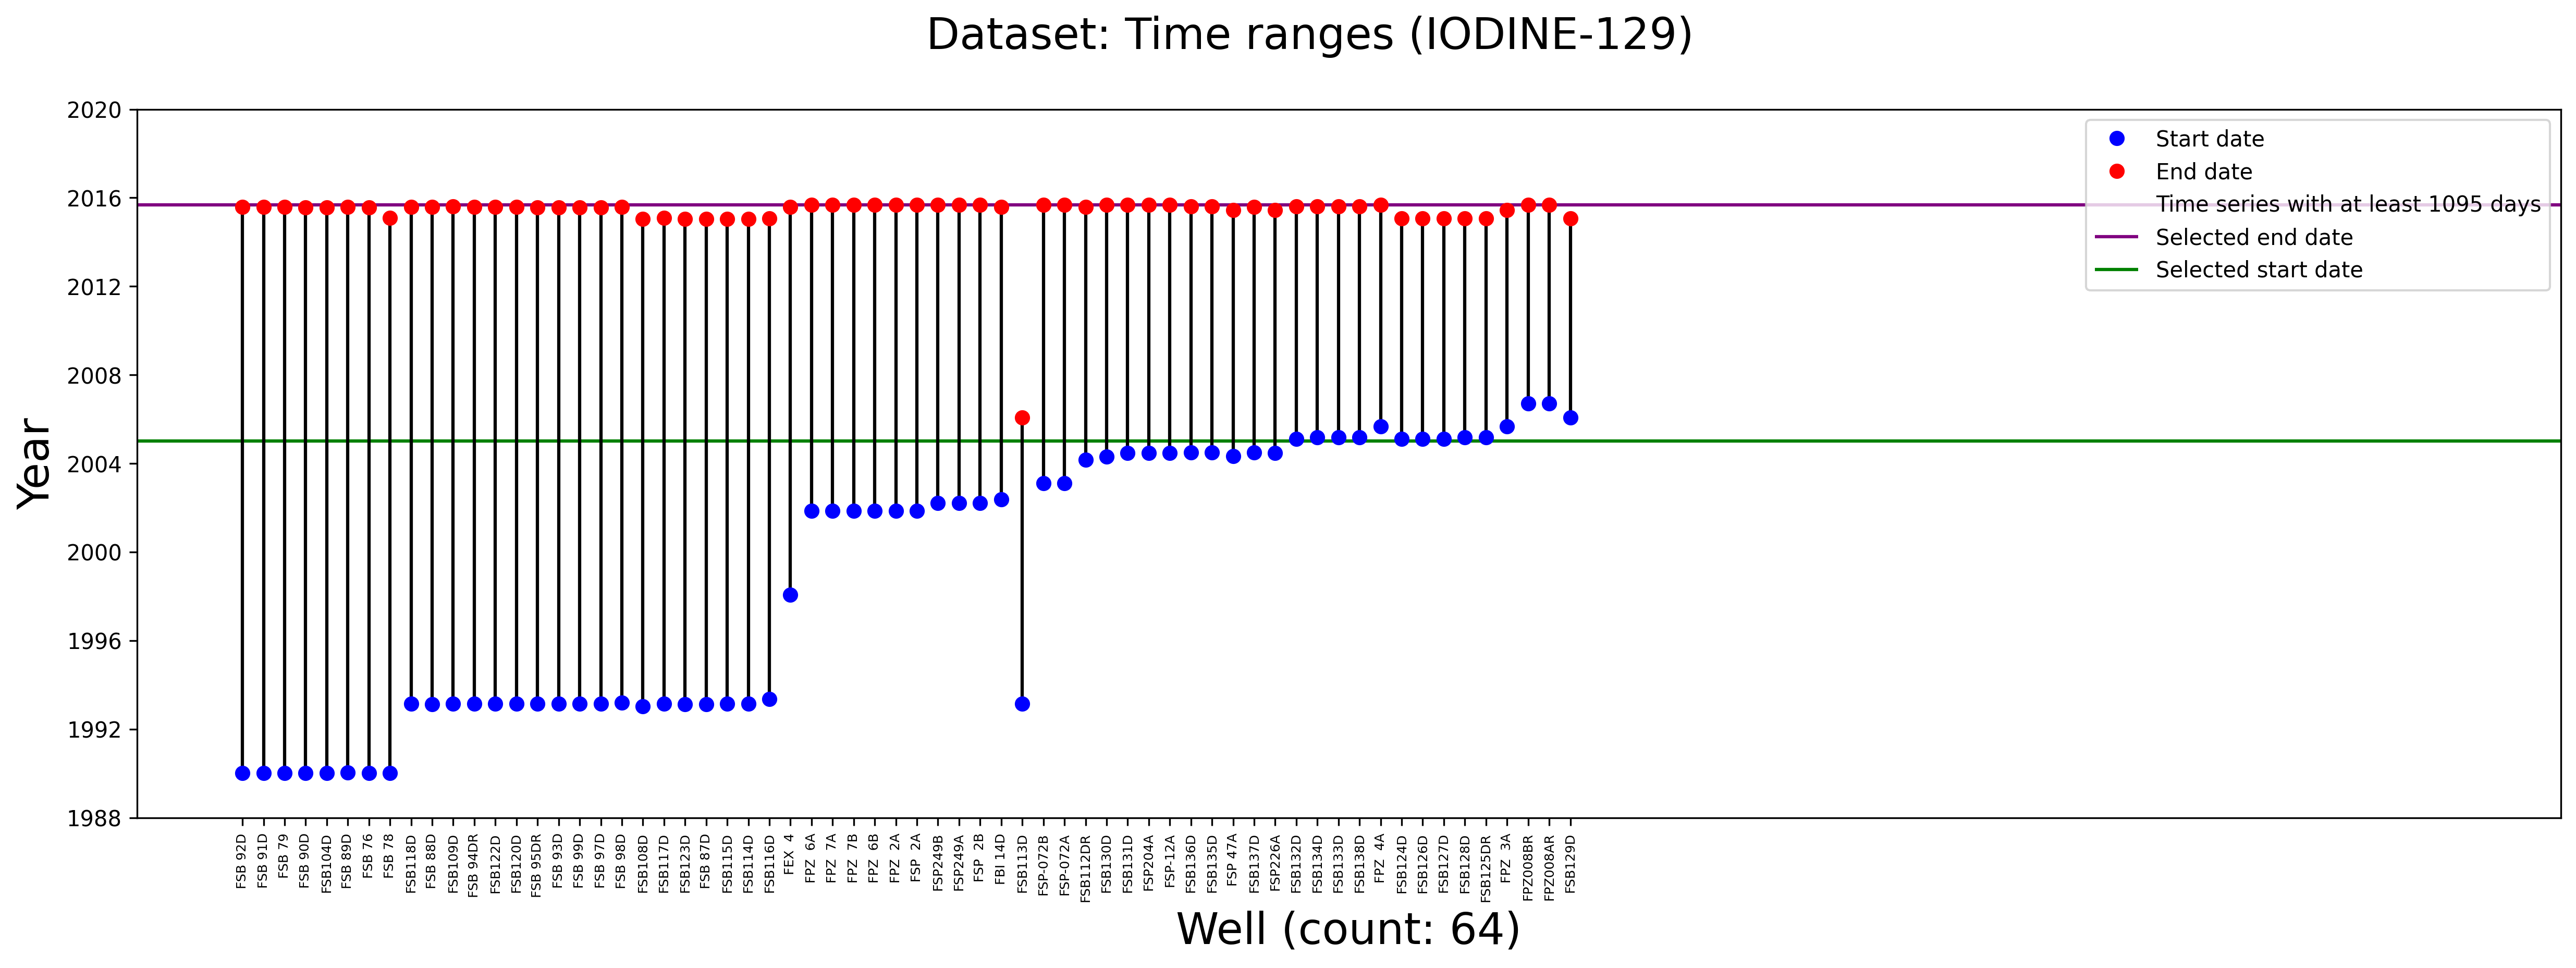

In [24]:
# Added filtering of 'Upper Aquifer' Wells
pylenm.plot_all_time_series_simple(analyte_name='IODINE-129',min_days=3*365, x_max_lim=110, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], start_date='2005-1-1')

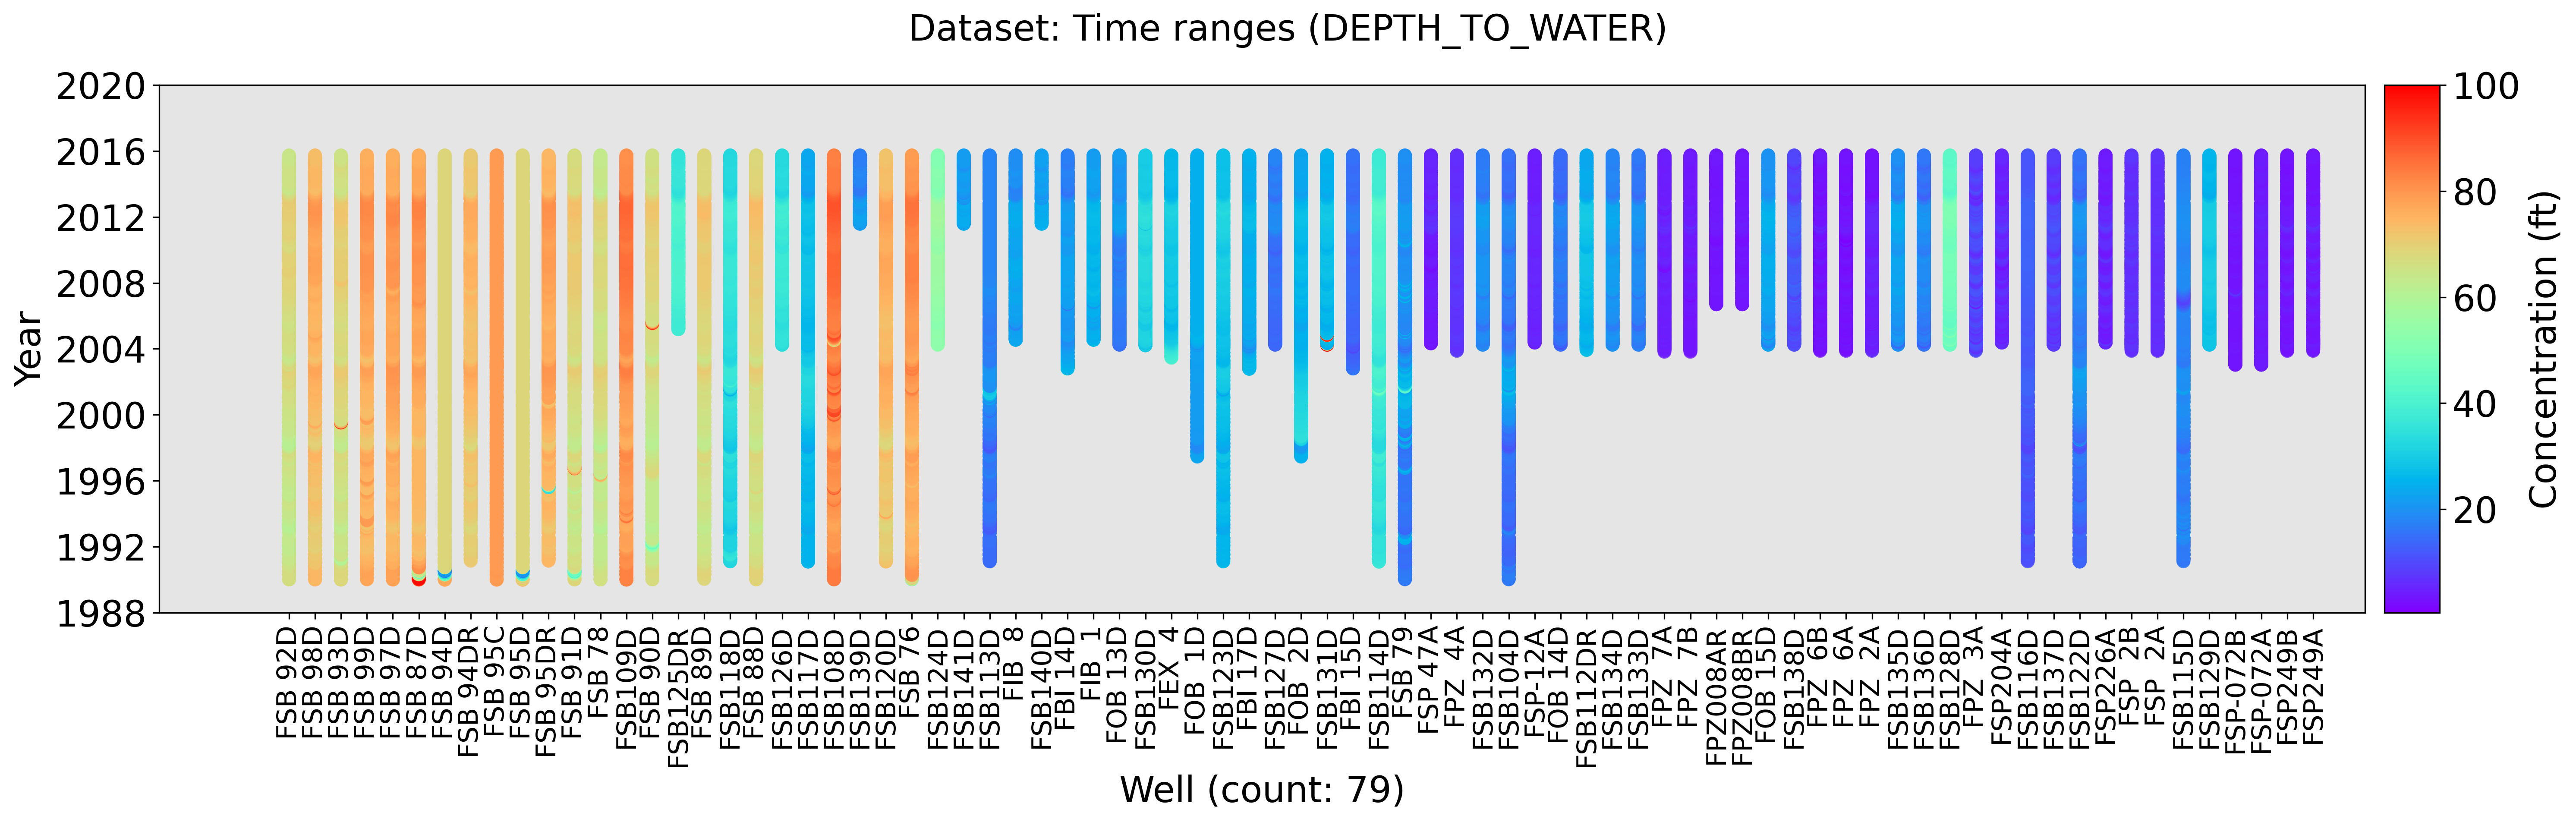

In [25]:
WT_UA = pylenm.plot_all_time_series(analyte_name='DEPTH_TO_WATER', x_max_lim=80, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], 
                                    x_label_size=15, marker_size=60, return_data=True, cbar_max=100)

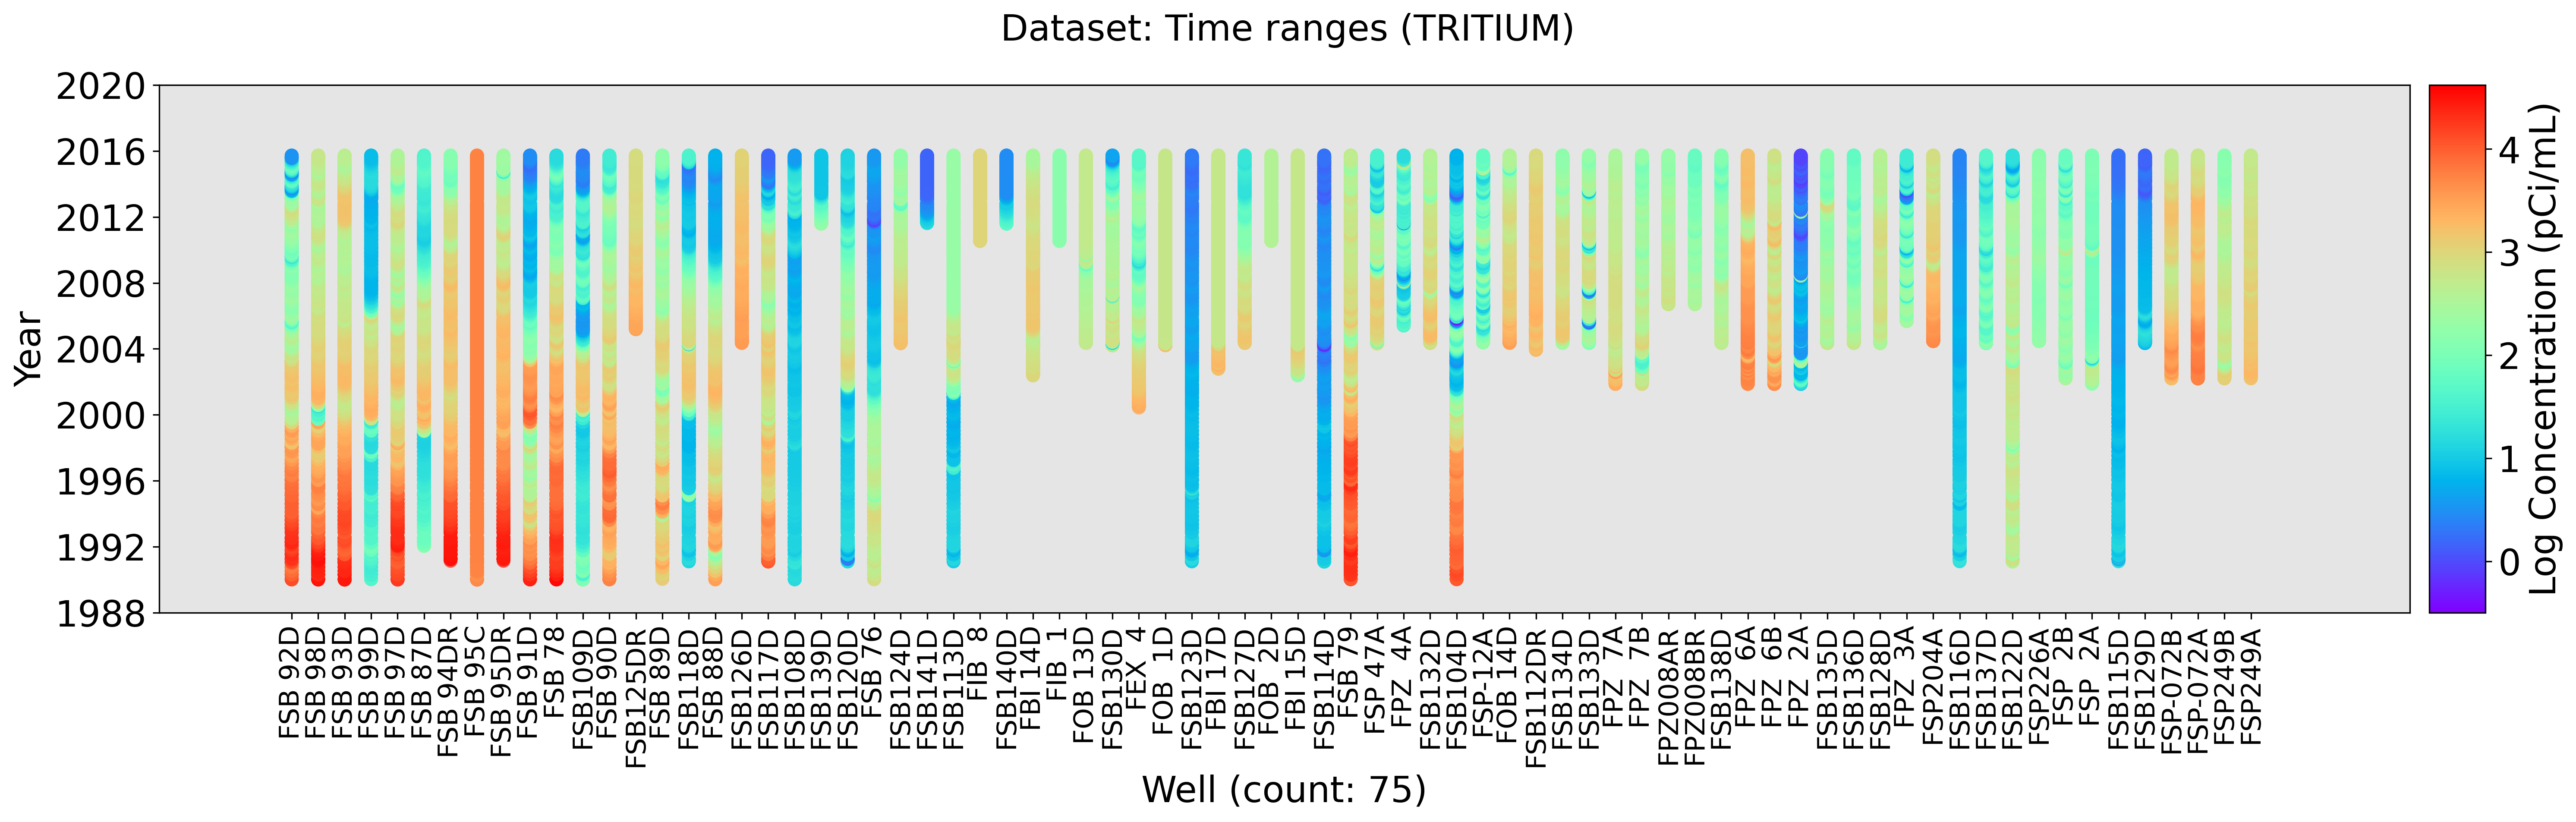

In [26]:
TR_UP = pylenm.plot_all_time_series(analyte_name='TRITIUM', x_max_lim=80, filter=True, col='AQUIFER', equals=['UAZ_UTRAU'], 
                                x_label_size=15, marker_size=60, log_transform=True, return_data=True, drop_cols=['FSB131D'],
                                cbar_min=-0.5) 

In [27]:
usage.get_FunctionDescription('plot_data')


plot_data (well_name, analyte_name, log_transform=True,
     alpha=0, year_interval=2, plot_inline=True, save_dir='plot_data')
Description:
    Plot concentrations over time of a specified well and analyte with a smoothed curve on interpolated data points.
Parameters:
    well_name (string): name of the well to be processed
    analyte_name (string): name of the analyte to be processed
    log_transform (bool): choose whether or not the data should be transformed to log base 10 values
    alpha (int): value between 0 and 10 for line smoothing
    year_interval (int): plot by how many years to appear in the axis e.g.(1 = every year, 5 = every 5 years, ...)
    plot_inline (bool): choose whether or not to show plot inline
    save_dir (string): name of the directory you want to save the plot to



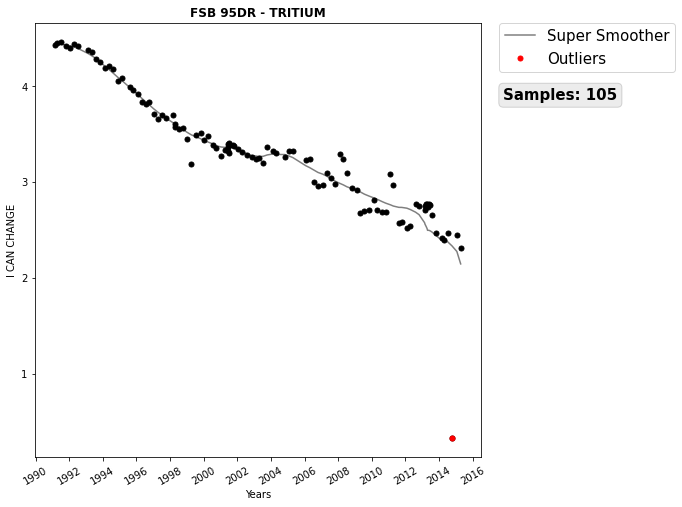

In [28]:
pylenm.plot_data(well_name= 'FSB 95DR', analyte_name='TRITIUM', y_label="I CAN CHANGE")

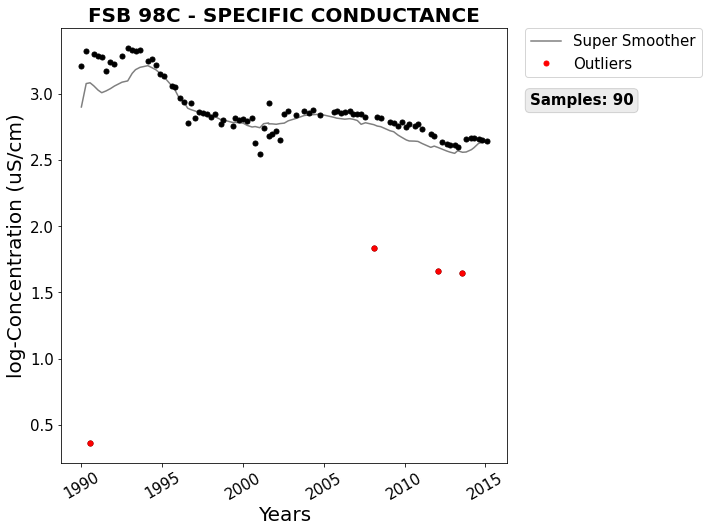

In [29]:
pylenm.plot_data(well_name= 'FSB 98C', analyte_name='SPECIFIC CONDUCTANCE', year_interval=5)

When using the interpolation functionality, a resampling frequency can be specifed. Correct inputs for the the frequency can be found in the function description. 

In [30]:
usage.get_FunctionDescription('interpolate_wells_by_analyte')


interpolate_wells_by_analyte (analyte, frequency='2W', rm_outliers=True, z_threshold=3)
Description: 
    Resamples analyte data based on the frequency specified and interpolates the values in between. 
    NaN values are replaced with the average value per well.
Parameters:
    analyte (string): analyte name for interpolation of all present wells.
    frequency (string): {‘D’, ‘W’, ‘M’, ‘Y’} frequency to interpolate. 
        See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html for valid frequency inputs. 
        (e.g. ‘W’ = every week, ‘D ’= every day, ‘2W’ = every 2 weeks)
    rm_outliers (bool): flag to remove outliers in the data
    z_threshold (int): z_score threshold to eliminate outliers




The `interpolate_wells_by_analyte` function is great as it interpolates and combines all of the wells with the same analyte. There is no need to specify a start and end date as the algorithm will find the optimum start and end date.

In [31]:
wt = pylenm.interpolate_wells_by_analyte(analyte='DEPTH_TO_WATER',
                                         frequency= 'D',
                                         rm_outliers=True,
                                         z_threshold=2.5)
wt

FSB 87D    FSB113C    FSB123D    FSB138D   FSP249A    FBI 17D  \
2003-11-18  75.616854  22.193247  27.101429  10.879913  3.900000  24.470516   
2003-11-19  75.647753  22.189221  27.112857  10.879913  3.891071  24.446839   
2003-11-20  75.678652  22.185195  27.124286  10.879913  3.882143  24.423161   
2003-11-21  75.709551  22.181169  27.135714  10.879913  3.873214  24.399484   
2003-11-22  75.740449  22.177143  27.147143  10.879913  3.864286  24.375806   
...               ...        ...        ...        ...       ...        ...   
2015-09-20  76.270000  23.191207  27.800000   9.800000  3.700000  25.138462   
2015-09-21  76.270000  23.194138  27.800000   9.800000  3.700000  25.145641   
2015-09-22  76.270000  23.197069  27.800000   9.800000  3.700000  25.152821   
2015-09-23  77.139965  22.145371  28.054023  10.879913  3.886915  24.772299   
2015-09-24  76.270000  23.200000  27.800000   9.800000  3.700000  25.160000   

              FSB 93C     FSB 78B    FSB 79A    FSB 79B    FSB 79C    FOB 15D  \
2003-11-18  69.222667  119.292418  61.134545  60.972727  23.935506  22.763149   
2003-11-19  69.220111  119.289451  61.135909  60.973295  23.913933  22.763149   
2003-11-20  69.217556  119.286484  61.137273  60.973864  23.892360  22.763149   
2003-11-21  69.215000  119.283516  61.138636  60.974432  23.870787  22.763149   
2003-11-22  69.212444  119.280549  61.140000  60.975000  23.849213  22.763149   
...               ...         ...        ...        ...        ...        ...   
2015-09-20  68.700000  119.500000  61.880000  61.700000  23.000000  20.000000   
2015-09-21  68.700000  119.500000  61.880000  61.700000  23.000000  20.000000   
2015-09-22  68.700000  119.500000  61.880000  61.700000  23.000000  20.000000   
2015-09-23  69.538644  119.492840  61.033443  61.039482  23.041634  22.763149   
2015-09-24  68.700000  119.500000  61.880000  61.700000  23.000000  20.000000   

              FSB 88C    FSB136D   FPZ  7A    FSB122C    FSB 76C    FSB 87C  \
2003-11-18  71.556364  17.592556  4.600000  21.879630  81.657333  79.752247   
2003-11-19  71.569773  17.592556  4.590714  21.879012  81.683222  79.773034   
2003-11-20  71.583182  17.592556  4.581429  21.878395  81.709111  79.793820   
2003-11-21  71.596591  17.592556  4.572143  21.877778  81.735000  79.814607   
2003-11-22  71.610000  17.592556  4.562857  21.877160  81.760889  79.835393   
...               ...        ...       ...        ...        ...        ...   
2015-09-20  72.400000  16.200000  4.600000  19.300000  82.750000  79.950000   
2015-09-21  72.400000  16.200000  4.600000  19.300000  82.750000  79.950000   
2015-09-22  72.400000  16.200000  4.600000  19.300000  82.750000  79.950000   
2015-09-23  72.529816  17.592556  4.564815  20.987590  83.109873  80.693670   
2015-09-24  72.400000  16.200000  4.600000  19.300000  82.750000  79.950000   

            FSB142D    FSB116D     FSB 87A    FSB 97C    FSB 89D     FSB 98A  \
2003-11-18  30.7225  11.955579  134.830899  79.350602  65.790909  131.630000   
2003-11-19  30.7225  11.954421  134.829213  79.362048  65.818182  131.630000   
2003-11-20  30.7225  11.953263  134.827528  79.373494  65.845455  131.630000   
2003-11-21  30.7225  11.952105  134.825843  79.384940  65.872727  131.630000   
2003-11-22  30.7225  11.950947  134.824157  79.396386  65.900000  131.630000   
...             ...        ...         ...        ...        ...         ...   
2015-09-20  31.1400  11.600000  135.950000  79.030000  68.150000  131.630000   
2015-09-21  31.1400  11.600000  135.950000  79.030000  68.150000  131.630000   
2015-09-22  31.1400  11.600000  135.950000  79.030000  68.150000  131.630000   
2015-09-23  30.7225  12.093852  134.977415  80.141364  67.805397  131.632999   
2015-09-24  31.1400  11.600000  135.950000  79.030000  68.150000  131.630000   

             FPZ  4A   FSB 95DR    FSB114C    FSB115C    FSB 99C     FSB 76A  \
2003-11-18  8.200000  76.220000  40.203704  23.501053  79.256364  139.570000   
2003-11-19  8.190741  

Let's look at the difference between removing the outliers and keeping them.

<AxesSubplot:>

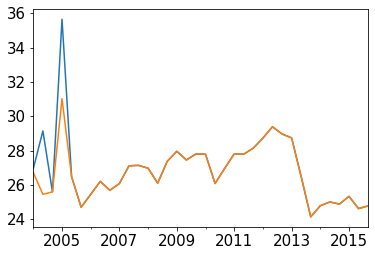

In [32]:
freq = '4M'
analyte = 'DEPTH_TO_WATER'

wt_with_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                       frequency = freq,
                                                       rm_outliers=False)

wt_without_outliers = pylenm.interpolate_wells_by_analyte(analyte = analyte,
                                                          frequency = freq,
                                                          rm_outliers=True,
                                                          z_threshold=1.5)

wt_with_outliers['FSB131D'].plot()
wt_without_outliers['FSB131D'].plot()

<AxesSubplot:>

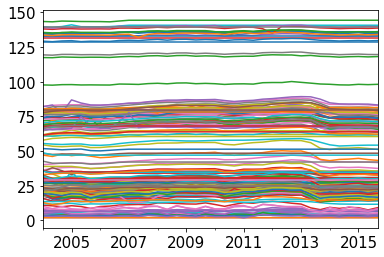

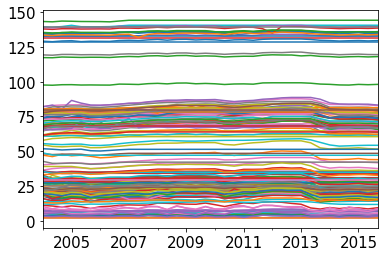

In [33]:
wt_with_outliers.plot(legend=None)
wt_without_outliers.plot(legend=None)

The `interpolate_well_data` function is useful if you are only looking at one well at a time. But has limited functionality as it can only take in **ONE** well as a parameter. 

In [34]:
pylenm.interpolate_well_data(well_name='FSB 95DR',
                             analytes=['DEPTH_TO_WATER', 'URANIUM-238'],
                             frequency='2M')

DEPTH_TO_WATER  URANIUM-238
COLLECTION_DATE                             
1993-02-28               73.030  1620.000000
1993-04-30               72.120  1475.000000
1993-06-30               71.325  1330.000000
1993-08-31               71.940  1100.000000
1993-10-31               72.540  1155.000000
...                         ...          ...
2014-12-31               75.375   239.666667
2015-02-28               75.610   232.000000
2015-04-30               75.000   224.333333
2015-06-30               74.615   216.666667
2015-08-31               74.230   209.000000

[136 rows x 2 columns]